# $\color{cyan}{\textbf{Time series forecasting; Covid 19 in Brazil}}$ 

# $\color{cyan}{\textbf{1. Importação das bibliotecas}}$ 

In [280]:
"""
1°) Importação do pandas como pd para trabalhar com dados.
"""
import pandas as pd
"""
2°) Importação do numpy como np para trabalhar com matrizes e tudo mais.
"""
import numpy as np
"""
3°) Importação do matplotlib.pyplot como plt para fazer gráficos.
"""
import matplotlib.pyplot as plt
"""
4°) De matplotlib.ticker vamos importar o AutoMinorLocator e o MaxNLocator para trabalhar com os "ticks"
    dos gráficos.
"""
import matplotlib.ticker as mticker
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
"""
5°) De matplotlib.font_manager vamos importar FontProperties para criar fontes de texto.
"""
from matplotlib.font_manager import FontProperties
"""
6°) Importação do seaborn para fazer gráficos
"""
import seaborn as sbn
"""
7°) Importação de pycaret.time_series para trabalhar com séries temporais
"""
from pycaret.time_series import *

# $\color{cyan}{\textbf{2. Trazendo os dados para o python}}$ 

In [281]:
Dados = pd.read_csv("worldometer_coronavirus_daily_data.csv")
"""
Filtrando para pegar apenas os dados do Brazil
"""
Brazil = Dados.loc[Dados["country"] == "Brazil"]
Brazil.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
19812,2020-2-15,Brazil,0.0,NaN,0.0,0.0,NaN
19813,2020-2-16,Brazil,0.0,NaN,0.0,0.0,NaN
19814,2020-2-17,Brazil,0.0,NaN,0.0,0.0,NaN
19815,2020-2-18,Brazil,0.0,NaN,0.0,0.0,NaN
19816,2020-2-19,Brazil,0.0,NaN,0.0,0.0,NaN


# $\color{cyan}{\textbf{3. Pré-processsamento de dados}}$ 

In [282]:
"""
Como já sabemos que se trata de dados apenas no Brasil, não faz sentido manter a colunas "country"
"""
Brazil.drop(["country"], axis = 1, inplace = True)
"""
Tranformação da data de object para datetime64[ns]
"""
Brazil["date"] = pd.to_datetime(Brazil["date"])
"""
Vamos filtrar mais ainda para que nossa contagem de tempo comece na data: 01/03/2020
"""
Brazil = Brazil.loc[Brazil["date"] > pd.Timestamp("2020-2-29")]

# $\color{cyan}{\textbf{3.1. Dados missing}}$

In [283]:
"""
Calcula as porcentagens de dados missing em cada coluna do DF
"""
Brazil.isnull().sum()/len(Brazil["date"])

date                       0.0
cumulative_total_cases     0.0
daily_new_cases            0.0
active_cases               0.0
cumulative_total_deaths    0.0
daily_new_deaths           0.0
dtype: float64

# $\color{cyan}{\textbf{3.2. Dtypes}}$

In [284]:
Brazil.dtypes

date                       datetime64[ns]
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

# $\color{cyan}{\textbf{3.3. Análise dos dados}}$

In [285]:
Brazil.columns = ["Data", 
                  "Total de casos (cumulativo)", 
                  "Novos casos (diário)", 
                  "Casos ativos", 
                  "Total de mortes (cumulativo)",
                  "Novas mortes (diário)"]

# $\rho = \frac{\textbf{Cov (x, y)}}{\sqrt{\textbf{Var(x)} \cdot \textbf{Var(y)}}}$

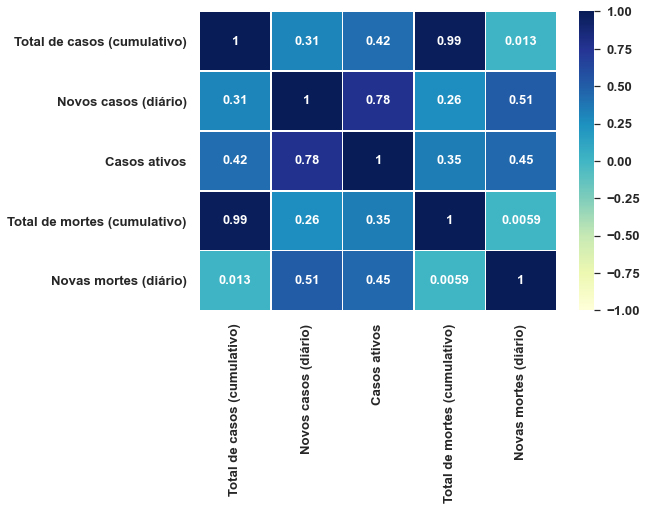

In [286]:
"""
Vamos começar plotando um mapa de calor para avaliar o coeficiente de correlação de Pearson p entre as
variáveis.
"""
sbn.heatmap(Brazil.corr(), # Matriz de correlação
            vmin = -1, # p min
            vmax = 1, # p max
            annot = True, # Anotar p = True
            cmap = "YlGnBu", # Colormap
            linewidths =0.5, # width da linha de controno entre as células do mapa de calor
            linecolor="white", # cor de tais linhas
            annot_kws={"size": 13}) # size dos números no heatmap
"""
Mudando o size da fontedos labels
"""
sbn.set(font_scale=1.2)
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Mostrar gráfico
"""
plt.show()

$\color{cyan}{\textbf{$\bullet$ Correlação muito forte entre total de casos (cumulativo) e total de mortes (cumulativo)}}$
$\color{cyan}{\textbf{$\bullet$ Correlação forte entre novos casos (diário) e casos ativos}}$
$\color{cyan}{\textbf{$\bullet$ Correlação moderada entre novos casos (diário) e novas mortes (diário)}}$

#  $\color{cyan}{\textbf{Casos (cumulativo) e mortes (cumulativo)}}$

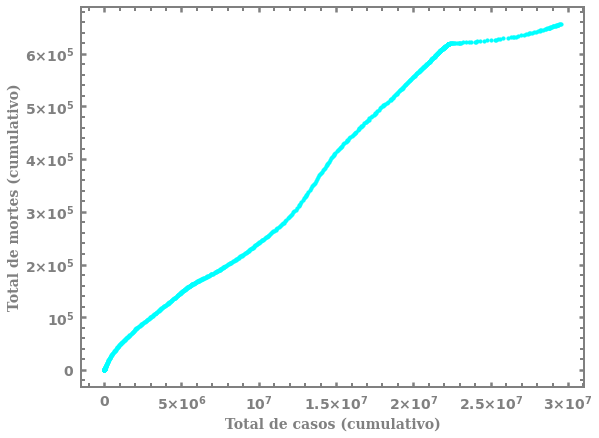

In [287]:
"""
Criação da primeira fonte de texto para colocar como fonte dos labels
"""
font1 = {"family": "serif", "weight": "bold", "color": "gray", "size": 14}
"""
Criação da segunda fonte de texto para colocar como fonte da legenda
"""
font2 = FontProperties(family = "serif",
                       weight = "bold",
                       size = 14)
"""
Cria um "lugar" com size (9, 7) para alocar a figura
"""
fig, axs = plt.subplots(figsize = (9, 7))
"""
Plota um scatter entre o total de casos (cumulativo) e total de mortes (cumulativo)
"""
axs.scatter(Brazil["Total de casos (cumulativo)"], 
            Brazil["Total de mortes (cumulativo)"], 
            color = "cyan",
            s = 10)
axs.grid(False)
"""
Definindo a "grossura" e a cor do eixos
"""
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
"""
Trabalha com os ticks do gráfico
"""    
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
"""
Números com notação científica
"""
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
"""
Descrição para cada eixo
"""
axs.set_xlabel("Total de casos (cumulativo)", fontdict = font1)
axs.set_ylabel("Total de mortes (cumulativo)", fontdict = font1)
"""
plt.rcParams["axes.labelweight"] = "bold" mostra em negrito os números nos eixos.
"""
plt.rcParams["axes.labelweight"] = "bold"
"""
Definindo um fundo branco para a imagem
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
"""
Mostrar o gráfico
"""
plt.show()

#  $\color{cyan}{\textbf{Novos casos (diário) e casos ativos}}$

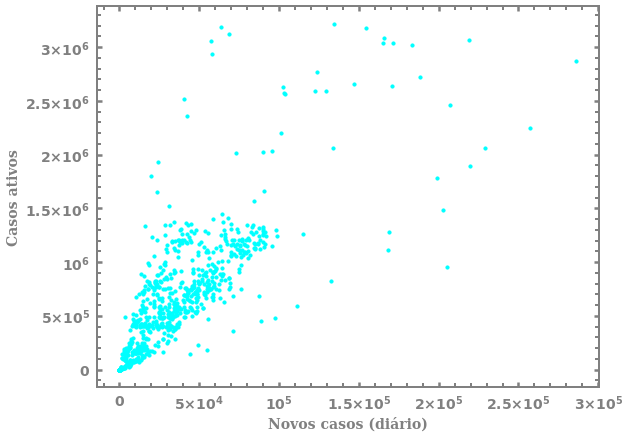

In [288]:
fig, axs = plt.subplots(figsize = (9, 7))
axs.scatter(Brazil["Novos casos (diário)"], 
            Brazil["Casos ativos"], 
            color = "cyan",
            s = 10)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Novos casos (diário)", fontdict = font1)
axs.set_ylabel("Casos ativos", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

#  $\color{cyan}{\textbf{Novos casos (diário) e Novas mortes (diário)}}$

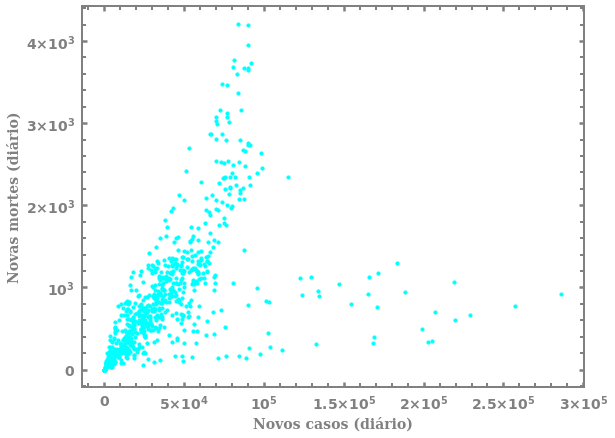

In [289]:
fig, axs = plt.subplots(figsize = (9, 7))
axs.scatter(Brazil["Novos casos (diário)"], 
            Brazil["Novas mortes (diário)"], 
            color = "cyan",
            s = 10)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Novos casos (diário)", fontdict = font1)
axs.set_ylabel("Novas mortes (diário)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

#  $\color{cyan}{\textbf{Total de casos (cumulativo)}}$

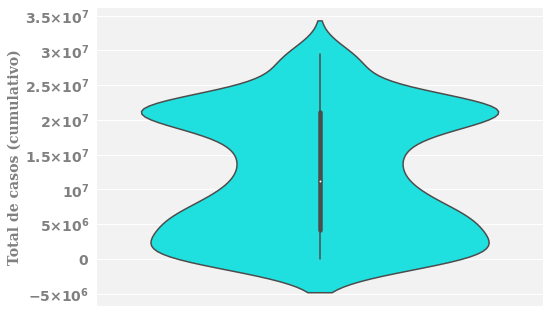

In [290]:
"""
Plot de um gráfico violino
"""
sbn.violinplot(data = Brazil, y = "Total de casos (cumulativo)", palette = ["cyan"])
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = False, bottom = False, top = False, right = False)
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("gray")
Cor_fundo.patch.set_alpha(0.1)
plt.ylabel("Total de casos (cumulativo)", fontdict = font1)
plt.show()

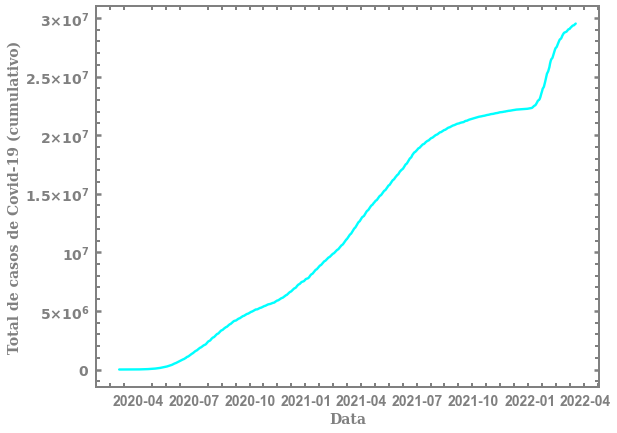

In [291]:
fig, axs = plt.subplots(figsize = (9, 7))
axs.plot(Brazil["Data"], 
            Brazil["Total de casos (cumulativo)"], 
            color = "cyan",
            linewidth = 2.4)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Total de casos de Covid-19 (cumulativo)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{$\bullet$ Como a variável é cumulativa, esse gráfico é estritamente crescente.}}$

# $\color{cyan}{\textbf{Novos casos (diário)}}$

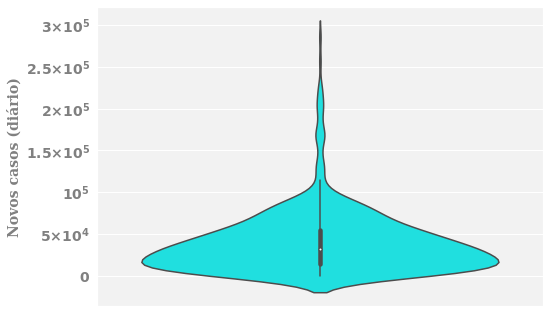

In [292]:
sbn.violinplot(data = Brazil, y = "Novos casos (diário)", palette = ["cyan"])
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = False, bottom = False, top = False, right = False)
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("gray")
Cor_fundo.patch.set_alpha(0.1)
plt.ylabel("Novos casos (diário)", fontdict = font1)
plt.show()

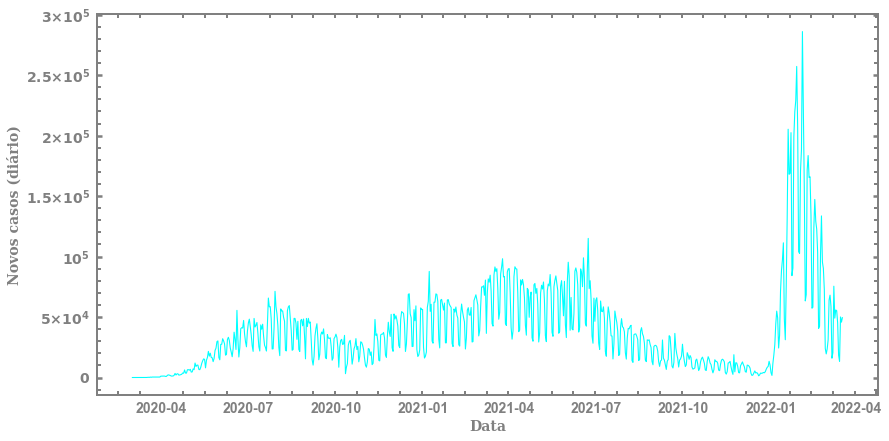

In [293]:
fig, axs = plt.subplots(figsize = (14, 7))
axs.plot(Brazil["Data"], 
            Brazil["Novos casos (diário)"], 
            color = "cyan",
            linewidth = 1.1)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Novos casos (diário)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{$\bullet$ Graças ao avanço da vacinação no Brasil, o número de novos casos de covid-19 vem caindo...}}$

# $\color{cyan}{\textbf{Casos ativos}}$

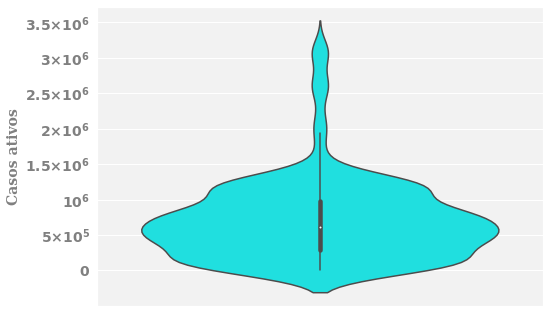

In [294]:
sbn.violinplot(data = Brazil, y = "Casos ativos", palette = ["cyan"])
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = False, bottom = False, top = False, right = False)
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("gray")
Cor_fundo.patch.set_alpha(0.1)
plt.ylabel("Casos ativos", fontdict = font1)
plt.show()

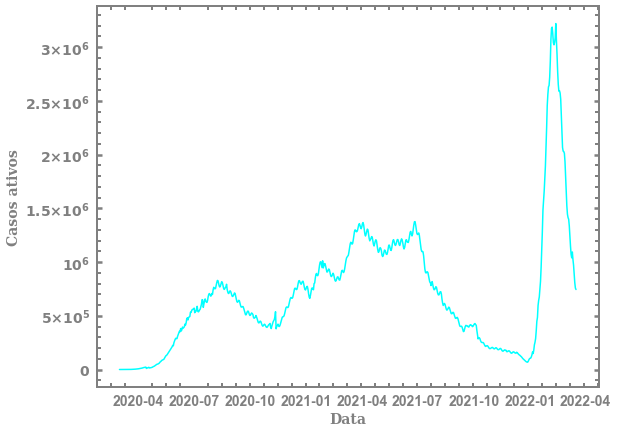

In [295]:
fig, axs = plt.subplots(figsize = (9, 7))
axs.plot(Brazil["Data"], 
            Brazil["Casos ativos"], 
            color = "cyan",
            linewidth = 1.5)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Casos ativos", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{$\bullet$ O número de casos ativos também vem diminuindo, o que é uma benção!}}$

# $\color{cyan}{\textbf{Total de mortes (cumulativo)}}$

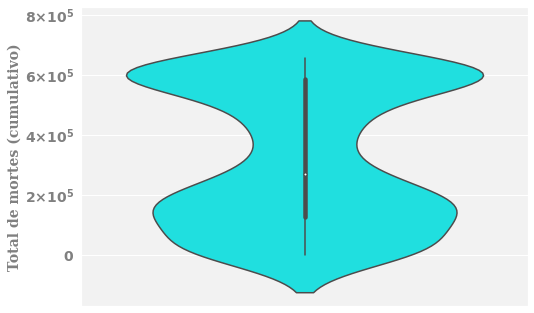

In [296]:
sbn.violinplot(data = Brazil, y = "Total de mortes (cumulativo)", palette = ["cyan"])
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = False, bottom = False, top = False, right = False)
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("gray")
Cor_fundo.patch.set_alpha(0.1)
plt.ylabel("Total de mortes (cumulativo)", fontdict = font1)
plt.show()

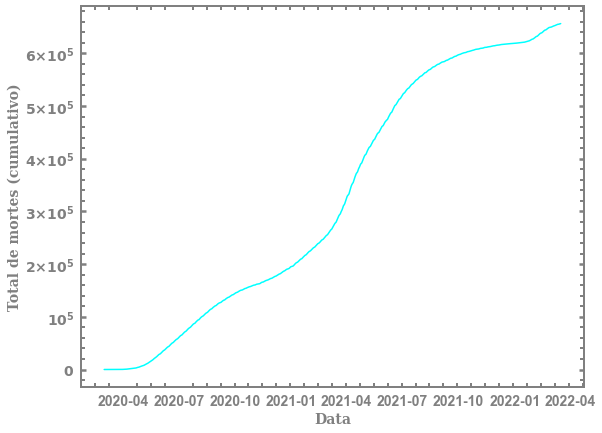

In [297]:
fig, axs = plt.subplots(figsize = (9, 7))
axs.plot(Brazil["Data"], 
            Brazil["Total de mortes (cumulativo)"], 
            color = "cyan",
            linewidth = 1.5)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Total de mortes (cumulativo)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{$\bullet$ Novamente, como a variável é cumulativa, esse gráfico é estritamente crescente.}}$

# $\color{cyan}{\textbf{Novas mortes (diário)}}$

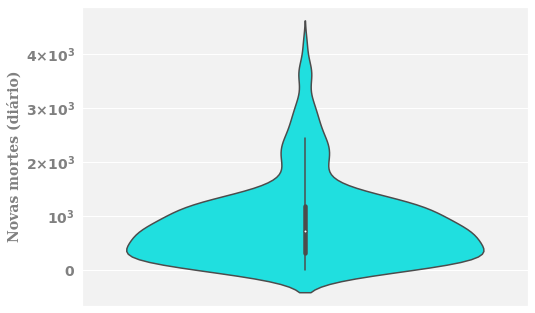

In [298]:
sbn.violinplot(data = Brazil, y = "Novas mortes (diário)", palette = ["cyan"])
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = False, bottom = False, top = False, right = False)
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("gray")
Cor_fundo.patch.set_alpha(0.1)
plt.ylabel("Novas mortes (diário)", fontdict = font1)
plt.show()

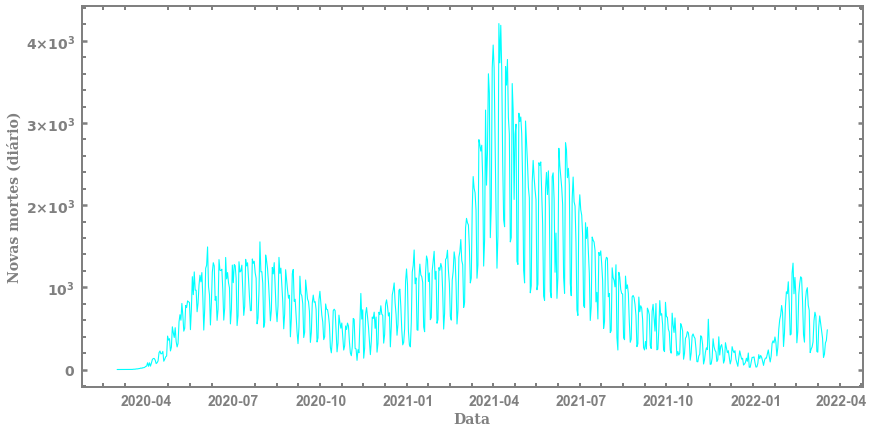

In [299]:
fig, axs = plt.subplots(figsize = (14, 7))
axs.plot(Brazil["Data"], 
            Brazil["Novas mortes (diário)"], 
            color = "cyan",
            linewidth = 1.1)
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Novas mortes (diário)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{$\bullet$ Perdemos muitas pessoas e com certeza não queremos perder mais! Nesse caso, os dados estão}}$
$\color{cyan}{\textbf{caminhando ao nosso favor!}}$

# $\color{cyan}{\textbf{4. Previsão de novos casos e mortes por covid-19 }}$

In [300]:
novos_casos_diarios = Brazil[["Data", "Novos casos (diário)"]]
casos_ativos = Brazil[["Data", "Casos ativos"]]
novas_mortes_diarias = Brazil[["Data", "Novas mortes (diário)"]]
novas_mortes_diarias.head()

,Data,Novas mortes (diário)
19827,2020-03-01,0.0
19828,2020-03-02,0.0
19829,2020-03-03,0.0
19830,2020-03-04,0.0
19831,2020-03-05,0.0


In [301]:
"""
Transformando a data em índices
"""
novos_casos_diarios.set_index("Data", drop = True, inplace = True)
casos_ativos.set_index("Data", drop = True, inplace = True)
novas_mortes_diarias.set_index("Data", drop = True, inplace = True)

# $\color{cyan}{\textbf{Previsão de novos casos diários}}$

In [302]:
setup(novos_casos_diarios, fh = 65, fold = 10, seasonal_period="D", n_jobs = -1, use_gpu = True) # Criando um setup

,Description,Value
0,session_id,2936
1,Target,Novos casos (diário)
2,Original Data,"(747, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(682,)"
7,Transformed Test Target,"(65,)"
8,Transformed Train Exogenous,"(682, 0)"
9,Transformed Test Exogenous,"(65, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='Novos casos (diário)',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', 

In [303]:
best_model = compare_models(exclude = "auto_arima") # Comparar modelos

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
ets,ETS,13149.2229,16565.8906,0.5527,0.4640,7.2864,6.1964,-0.6647,0.1170
exp_smooth,Exponential Smoothing,15442.6810,19142.0384,0.6093,0.5163,6.9782,5.9754,-1.1122,0.2220
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,14587.6552,17672.9082,0.6996,0.5209,7.8287,6.4602,-1.0802,0.6990
snaive,Seasonal Naive Forecaster,12810.3446,16127.9750,0.5270,0.5218,7.8719,6.5297,-0.5008,0.0160
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,14028.5860,17155.8485,0.6949,0.5303,7.6175,6.3294,-0.9017,0.1300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,15198.5859,18976.0663,0.7599,0.5345,10.1166,10.4457,-1.7521,0.1520
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,14569.1927,17606.7552,0.7081,0.5378,7.7245,6.3770,-1.0821,1.6120
theta,Theta Forecaster,16186.9502,19241.7592,0.7488,0.5384,7.8756,6.5499,-1.1673,0.0420
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,14700.0230,17834.3472,0.7097,0.5391,7.7618,6.4074,-1.0895,1.3300
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,14603.9630,17504.9758,0.6943,0.5407,7.7490,6.3789,-1.0990,0.2210


INFO:logs:master_model_container: 28
INFO:logs:display_container: 2
INFO:logs:AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='add', sp=7, start_params=None, trend='add')
INFO:logs:compare_models() successfully completed......................................


In [304]:
ets = create_model("ets") # Criar o melhor modelo

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-04-01,7644.8524,11174.5812,0.5750,0.8974,43.5852,39.8125,-0.6152
1,2020-06-05,17813.6592,21966.0222,0.5951,0.3986,8.4469,6.1454,-1.7587
2,2020-08-09,21889.5220,25437.2759,1.0779,0.5492,5.7743,3.9707,-2.6872
3,2020-10-13,13241.5848,16823.9554,0.4217,0.6017,2.9211,2.2388,-0.3907
4,2020-12-17,10327.1742,13096.4148,0.3305,0.2428,2.0665,1.6911,0.4054
5,2021-02-20,18157.8406,21041.8874,0.2623,0.3097,3.3732,2.4635,-0.0846
6,2021-04-26,9032.4564,12224.1718,0.1415,0.1424,1.5071,1.3019,0.6574
7,2021-06-30,17668.6022,20972.9653,0.5931,0.4232,2.7092,2.0209,-1.1137
8,2021-09-03,8556.7958,10006.4831,0.6768,0.5015,1.3293,0.9947,-1.0708
9,2021-11-07,7159.7417,12915.1487,0.8526,0.5736,1.1512,1.3245,0.0114


INFO:logs:master_model_container: 29
INFO:logs:display_container: 3
INFO:logs:AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='add', sp=7, start_params=None, trend='add')
INFO:logs:create_model() successfully completed......................................


In [305]:
final = finalize_model(ets) # finalizar o modelo
final

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x00000207D1223AF0>, estimator=AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='add', sp=7, start_params=None, trend='add'), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, 

AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='add', sp=7, start_params=None, trend='add')

In [306]:
pred = predict_model(final, fh = 60) # 60 dias de previsão
pred = pd.DataFrame(pred, columns = ["Data", "Novos casos (diário)"])
pred["Data"] = pred.index.to_timestamp()
pred = pred.loc[pred["Novos casos (diário)"] > 0]
pred

,Data,Novos casos (diário)
2022-03-18,2022-03-18,56636.9341
2022-03-19,2022-03-19,47198.7466
2022-03-20,2022-03-20,9352.0554
2022-03-21,2022-03-21,4729.6123
2022-03-22,2022-03-22,43159.3066
2022-03-23,2022-03-23,37870.0058
2022-03-24,2022-03-24,45302.5453
2022-03-25,2022-03-25,50796.2839
2022-03-26,2022-03-26,41358.0964
2022-03-27,2022-03-27,3511.4052


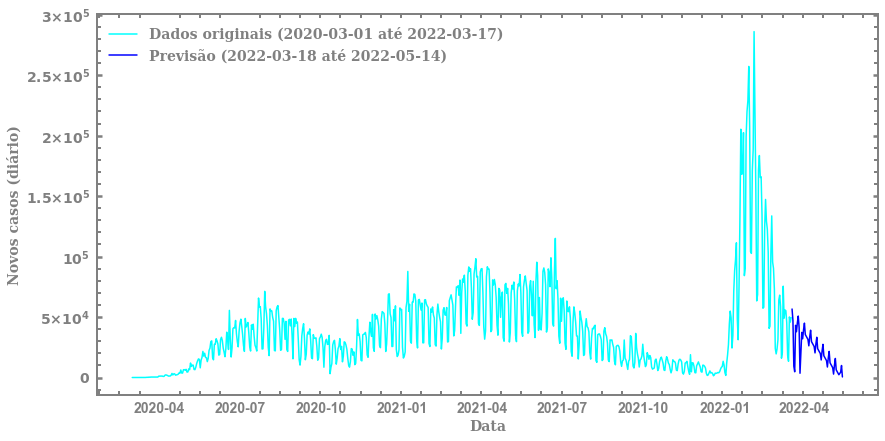

In [307]:
fig, axs = plt.subplots(figsize = (14, 7))
axs.plot(Brazil["Data"], 
        Brazil["Novos casos (diário)"], 
        color = "cyan",
        linewidth = 1.5,
        label = "Dados originais (2020-03-01 até 2022-03-17)")
axs.plot(pred["Data"],
         pred["Novos casos (diário)"],
         color = "blue",
         linewidth = 1.5,
         label = "Previsão (2022-03-18 até 2022-05-14)")
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Novos casos (diário)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{Muito bom! A previsão é que o número de casos (diário) diminua, como esperávamos.}}$

# $\color{cyan}{\textbf{Casos ativos}}$

In [308]:
setup(casos_ativos, fh = 60, fold = 10, seasonal_period="D", n_jobs=-1, use_gpu=True)

,Description,Value
0,session_id,3687
1,Target,Casos ativos
2,Original Data,"(747, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(687,)"
7,Transformed Test Target,"(60,)"
8,Transformed Train Exogenous,"(687, 0)"
9,Transformed Test Exogenous,"(60, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='Casos ativos',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrou

In [309]:
best_model = compare_models(exclude = "auto_arima")

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,160887.1937,219224.4635,0.2833,0.2279,5.2602,5.3881,-4.6061,0.1350
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,158280.6001,193400.0770,0.4035,0.2648,3.5047,3.3641,-3.3406,0.1410
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,158408.5516,196755.8941,0.4060,0.2648,3.5657,3.4717,-3.7161,0.1870
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,159436.9577,194658.5588,0.4123,0.2664,3.4982,3.3605,-3.4718,0.1350
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,161373.5267,197520.3649,0.4128,0.2671,3.5632,3.4266,-3.6729,0.1570
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,161373.5295,197520.3684,0.4128,0.2671,3.5632,3.4266,-3.6729,0.1790
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,161020.6721,196723.8792,0.4159,0.2687,3.5815,3.4331,-3.5054,0.1750
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,161020.6720,196723.8791,0.4159,0.2687,3.5815,3.4331,-3.5054,0.1980
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,161020.6721,196723.8792,0.4159,0.2687,3.5815,3.4331,-3.5054,0.1440
naive,Naive Forecaster,140449.5217,169947.9183,0.2938,0.2782,4.1415,3.6264,-1.7709,0.0170


INFO:logs:master_model_container: 28
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',
                                                        precompute='auto',
                                                        tol=None),
                    sp=7, window_length=7)
INFO:logs:compare_models() successfully completed......................................


In [310]:
omp_cds_dt = create_model("omp_cds_dt")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-26,444077.8790,703023.9408,0.7413,0.4258,26.6457,27.7759,-28.5020
1,2020-07-25,125737.0458,173112.6615,0.2002,0.1672,3.6340,3.7224,-3.8521
2,2020-09-23,46434.5211,72713.9232,0.1041,0.1185,1.2300,1.5266,-1.3337
3,2020-11-22,183128.5493,199029.4425,0.2410,0.2788,4.9396,4.2284,-2.5094
4,2021-01-21,96184.1248,113653.5907,0.1010,0.0968,2.1587,2.0458,0.2221
5,2021-03-22,185741.9188,224806.6032,0.1637,0.1460,3.7849,3.6607,-4.8280
6,2021-05-21,109342.3117,181594.9610,0.1098,0.0943,2.2306,3.0085,-1.0622
7,2021-07-20,297761.8175,334816.0847,0.6104,0.4277,5.6625,5.0192,-4.7494
8,2021-09-18,47734.3482,52315.8918,0.1923,0.1751,0.8945,0.7852,0.6736
9,2021-11-17,72729.4210,137177.5355,0.3692,0.3491,1.4212,2.1078,-0.1203


INFO:logs:master_model_container: 29
INFO:logs:display_container: 3
INFO:logs:BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',
                                                        precompute='auto',
                                                        tol=None),
                    sp=7, window_length=7)
INFO:logs:create_model() successfully completed......................................


In [311]:
final2 = finalize_model(omp_cds_dt)
final2

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x00000207BFDA87C0>, estimator=BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',
                                                        precompute='auto',
                                                        tol=None),
                    sp=7, window_length=7), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                               

BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',
                                                        precompute='auto',
                                                        tol=None),
                    sp=7, window_length=7)

In [312]:
pred2 = predict_model(final2, fh = 60)
pred2 = pd.DataFrame(pred2, columns = ["Data", "Casos ativos"])
pred2["Data"] = pred2.index.to_timestamp()
pred2 = pred2.loc[pred2["Casos ativos"] > 0]

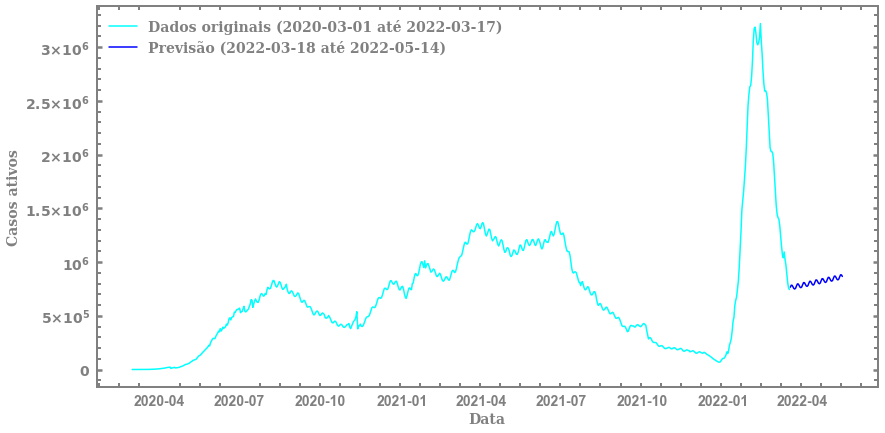

In [313]:
fig, axs = plt.subplots(figsize = (14, 7))
axs.plot(Brazil["Data"], 
            Brazil["Casos ativos"], 
            color = "cyan",
            linewidth = 1.5, label = "Dados originais (2020-03-01 até 2022-03-17)")
axs.plot(pred2["Data"],
         pred2["Casos ativos"],
         color = "blue",
         linewidth = 1.5,
         label = "Previsão (2022-03-18 até 2022-05-14)")
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Casos ativos", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()

$\color{cyan}{\textbf{O número de casos ativos aumentou!}}$

# $\color{cyan}{\textbf{Novas mortes (diário)}}$

In [314]:
setup(novas_mortes_diarias, fh = 60, fold = 10, seasonal_period="D", n_jobs=-1, use_gpu=True)

,Description,Value
0,session_id,5271
1,Target,Novas mortes (diário)
2,Original Data,"(747, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(687,)"
7,Transformed Test Target,"(60,)"
8,Transformed Train Exogenous,"(687, 0)"
9,Transformed Test Exogenous,"(60, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='Novas mortes (diário)',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_availabl...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', 

In [315]:
best_model = compare_models(exclude = "auto_arima")

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,293.0100,373.9681,0.5266,0.3631,2.2810,1.9799,-0.6659,0.0240
ets,ETS,405.3413,495.1349,0.6076,0.3935,3.3175,2.7610,-1.3847,0.1080
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,403.9243,495.1414,0.8248,0.4611,3.1559,2.6326,-2.8613,0.1920
exp_smooth,Exponential Smoothing,381.3639,464.4976,0.5820,0.4707,3.0730,2.5590,-0.7592,0.2340
croston,Croston,419.5909,512.5246,0.7801,0.4732,3.3178,2.7616,-1.0120,0.0110
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,386.6249,469.8505,0.7819,0.4791,3.0865,2.5548,-1.6364,1.2730
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,419.9113,508.3650,0.7741,0.4801,3.3447,2.7718,-1.7674,0.3800
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,401.4752,488.9890,0.7893,0.4821,3.1670,2.6283,-2.1075,0.1380
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,401.4738,488.9880,0.7893,0.4821,3.1670,2.6283,-2.1074,0.1400
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,401.4754,488.9895,0.7893,0.4821,3.1670,2.6283,-2.1075,0.1720


INFO:logs:master_model_container: 28
INFO:logs:display_container: 2
INFO:logs:NaiveForecaster(sp=7, strategy='last', window_length=None)
INFO:logs:compare_models() successfully completed......................................


In [316]:
snaive = create_model("snaive")
final3 = finalize_model(snaive)
final3

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-26,158.1500,193.3889,0.1518,0.1584,1.7780,1.4673,0.4597
1,2020-07-25,229.9333,278.5757,0.3366,0.2620,2.4448,2.1123,0.1388
2,2020-09-23,203.1833,248.3895,0.5930,0.3894,1.9158,1.6622,-0.2312
3,2020-11-22,276.1500,343.5762,0.3477,0.4450,2.5216,2.2185,-0.0976
4,2021-01-21,390.5167,579.2050,0.2481,0.3135,3.4448,3.5502,-0.0234
5,2021-03-22,457.8833,579.5359,0.1836,0.1861,3.6117,3.1962,0.5708
6,2021-05-21,371.4833,480.3910,0.2750,0.2221,2.2283,1.7841,0.4222
7,2021-07-20,466.5333,542.0085,0.8740,0.5172,2.6512,1.9517,-1.4373
8,2021-09-18,231.9833,293.2930,1.0311,0.5459,1.3437,1.0844,-1.2584
9,2021-11-17,144.2833,201.3173,1.2247,0.5916,0.8700,0.7717,-5.2026


INFO:logs:master_model_container: 29
INFO:logs:display_container: 3
INFO:logs:NaiveForecaster(sp=7, strategy='last', window_length=None)
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x00000207CDAAD970>, estimator=NaiveForecaster(sp=7, strategy='last', window_length=None), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing NaiveForecaster(sp=7, strategy='last', window_length=None)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x00000207CDAAD970>, estimator=NaiveForecaster(sp=7, strategy='last', window_length=None), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, verbo

NaiveForecaster(sp=7, strategy='last', window_length=None)

In [317]:
pred3 = predict_model(final3, fh = 60)
pred3 = pd.DataFrame(pred3, columns = ["Data", "Novas mortes (diário)"])
pred3["Data"] = pred3.index.to_timestamp()
pred3 = pred3.loc[pred3["Novas mortes (diário)"] > 0]

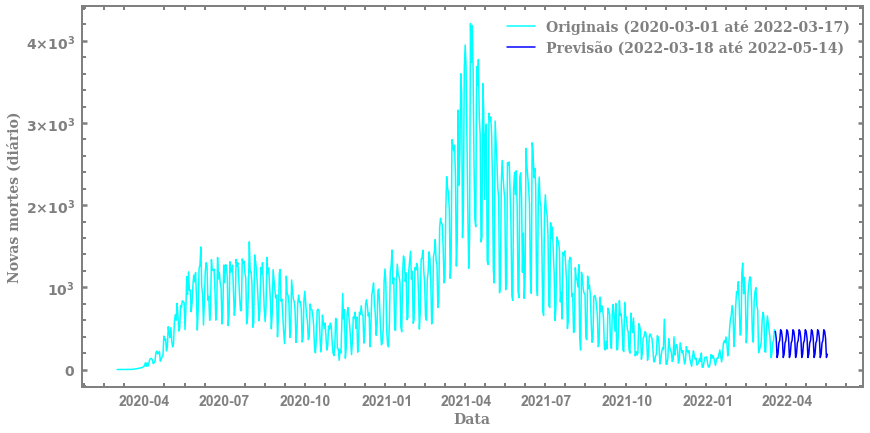

In [318]:
fig, axs = plt.subplots(figsize = (14, 7))
axs.plot(Brazil["Data"], 
            Brazil["Novas mortes (diário)"], 
            color = "cyan",
            linewidth = 1.5, label = "Originais (2020-03-01 até 2022-03-17)")
axs.plot(pred3["Data"],
         pred3["Novas mortes (diário)"],
         color = "blue",
         linewidth = 1.5,
         label = "Previsão (2022-03-18 até 2022-05-14)")
axs.grid(False)
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.5, left = True, bottom = False, top = False, right = True)
axs.tick_params(which = "minor", direction = "in", color = "gray", length=4, width = 2, left = True, bottom = True, top = True, right = True)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Novas mortes (diário)", fontdict = font1)
plt.rcParams["axes.labelweight"] = "bold"
fig.patch.set_facecolor("white")
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()